# El metodo k-means clustering
[Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
Un poco de historia de la pagina de Wikipedia.

* El metodo de k-means fue inventado por Hugo Seinhaus en 1956.
* El termino "k-means" fue acunhado por James MacQueen en 1967.
* El algoritmos que mostramos a continuacion fue elaborado por Suart Lloyd del Bell Labs in 1957.

Motivacion en la grafica que sigue.




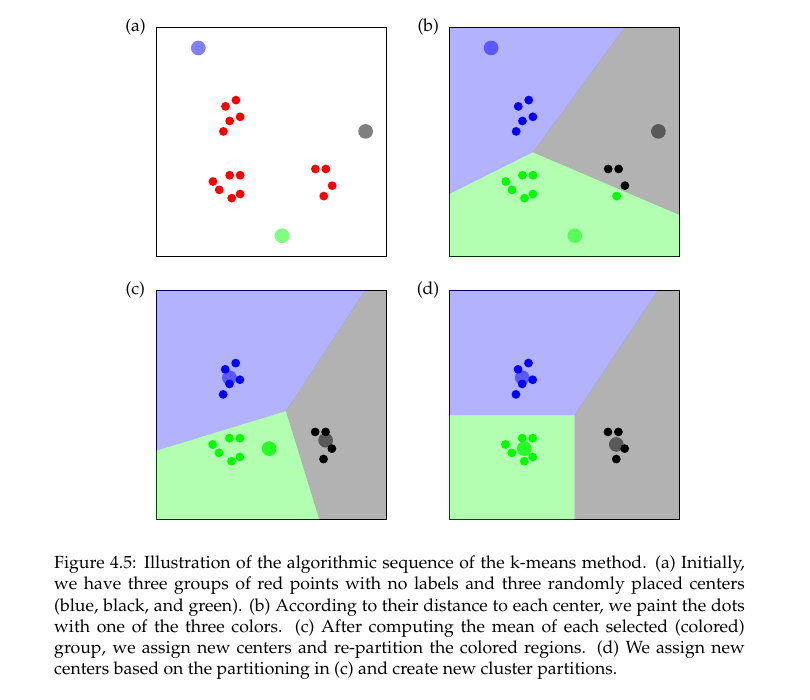

## La matematica

1. Se debe determinar el numero de clusters $k$. Como?
Mas adelante les explico. Por ahora se asume como un dato conocido. $k < m$, donde $m$ es el numero de datos.
Si $k=m$, no hay nada que hacer. No tiene sentido el algoritmo.

2. De forma aleatoria escoja $k$ "centros"
$j=1, \cdots, k$. Inicialmente ellos no son centros. Simplemente son $k$ puntos en $\mathbb{R}^n$.

3. Inicialice un vector de centros $c$ de $m$ elementos (tantos como puntos). Cada componente $c_i$ de $c$ denota un indice. Este indice es el indice del "capitan" (el centro mas cercano).

4. Hagamos una busqueda como sigue. Cada punto $x_i \in \mathbb{R}^n$, encuentra el **centro mas cercano**, lo llama $\mu_{c_i}$
y asigna $c_i$ al centro. $c_i$ puede tener numeros entre 1 y $k$
Esto divide los $m$ puntos en $k$ conjuntos. For ejemplo:
si tenemos 3 grupos (clusters) y 8 puntos. El vector $c$ puede
verse como $c=[1,1,2,3,1,3,2,2]. $
Esto significa $[x_1, x_2, x_5]$ estan mas cerca del centro $\mu_1$, que $[x_3, x_7, x_8]$ estan mas cerca del cenro $\mu_2$ y que $[x_4, x_6]$ estan mas cerca del centro $\mu_3$.

5. Se crean nuevos cenros (capitan) calculando la media de cada gurpo. Asi, en este ejemplo

$$\mu_1 = \frac{x_1 + x_2  + x_3}{3} $$
$$\mu_2 = \frac{x_3 + x_7 + x_8}{3} $$
$$\mu_3 = \frac{x_4 + x_6}{3} $$



6. Vuelva (rote) al paso 4.



Aunque aca no se usa la funcion de costo para el metodo del gradiente (como casi todo), pero si se usa para control de calidad y saber cuando parar.

$$J(x, c, \mu)= \sum_{i=1}^m \| x_i - \mu_c \|^2 $$

La siguiente grafica la van a generar ustedes en la proxima tarea.
La explico  oralmente.

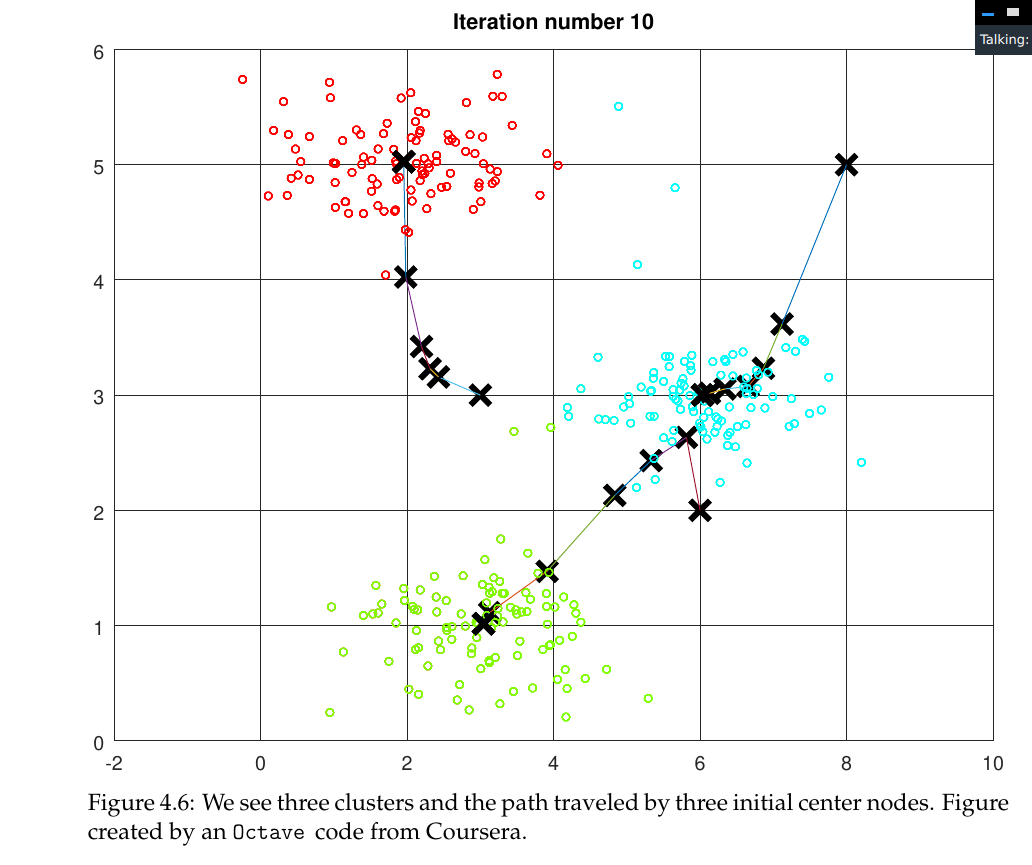

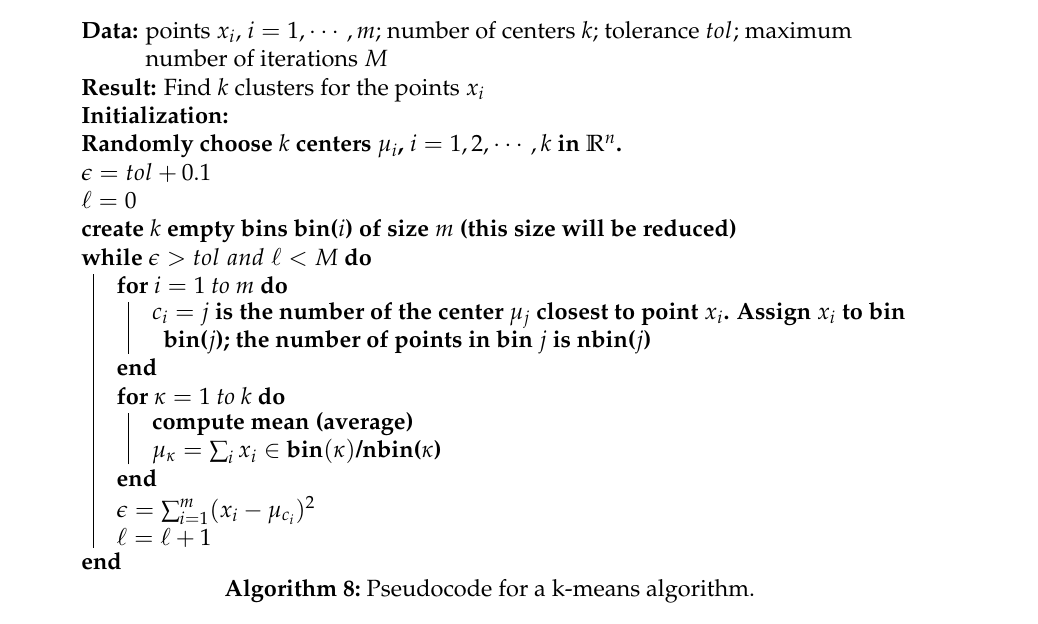

## como saber cual es numero "optimo" de clusters $k$?

Hay varios metodos:

1. Metodos directos:
    * Elbow mehod (lo explico enseguida). El codo
    * Silueta (silhouette) Tambien lo explico en esta o la proxima clase.

2. Metodos estaditicos. Esto lo tocamos tangencialmente (por no decir, no tocamos). El lenguaje `R`, iene asociados paquetes que proveen mas de 30 indices para ayudar a decidir sobre $k$. Estos indices corresponden al "gap statistical method"
[gap statiscal method](https://www.jstor.org/stable/2680607).

`Matlab` (`Octave`) y `Python` tambien tienen paquetes para este metodo.


### El metodo del codo.
Un imagen vale mas que mil palabras.


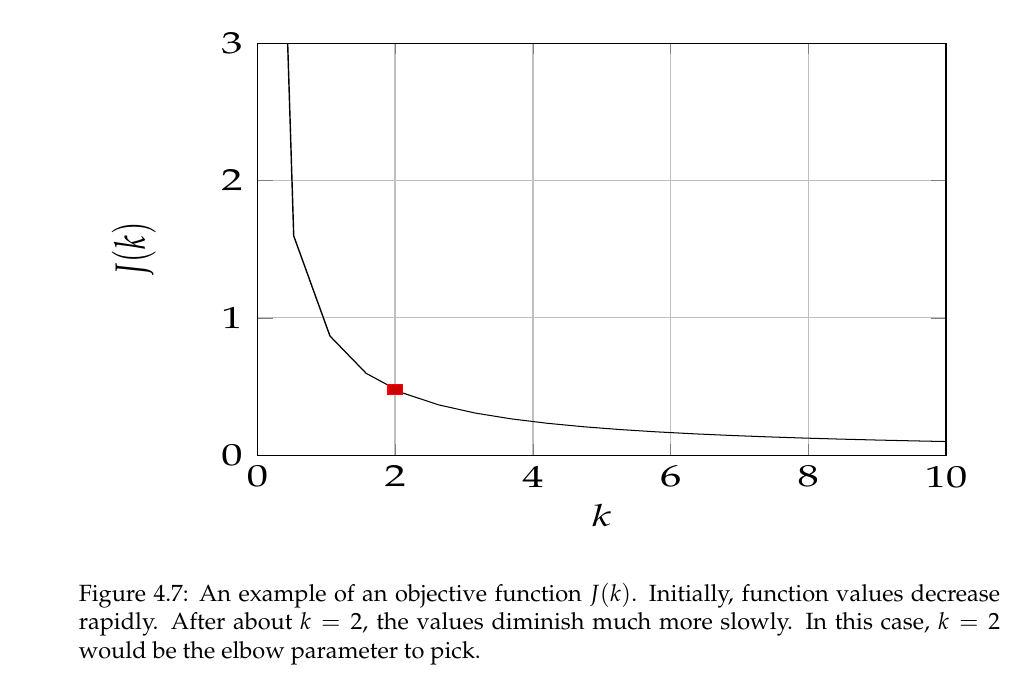

Que es el codo?
Es el punto donde se da "diminishing returns" donde la funcion costo beneficio se aplana. Donde la curva "plateu". Se vuelve asintotica.
Este metodo es muy cualitativo. Como se cuantifica?
Una forma de cuantificarlo es con la segunda derivada por que esta mide
la curvatura. Poco se usa.

## The average silhouette mehod (metodo de la silueta.
Asuma que los puntos estan divididos en un mero de clusters.
Vamos a describir dos terminos
* **cohesion**: Que tan pegados estan unos de otros en el mismo grupo.
* **separacion** : Que tan apartados estan los de un grupo con grupos agenos.

Definamos el cluster $C_I$ como sigue

$$C_I = \{ x_{I1}, x_{I2}, \cdots, x_{I k_I}   \} $$
dos indices por que? por que hay dos conceptos, cluster y dato.
$I$ corresponde al cluster $I$, $1,2, \cdots, k_I$ es el punto dentro de este cluster. $k_I=|C_I|$.

$I=1,2, \cdots, n$ donde $n$ es el numero de clusters.

Vamos a estudiar los dos conceptos: cohesion, separacion.

* **cohesion**: Por definicion se define $a_{iI}$
la distancia media del punto $x_{Ii}$ a cada punto dentro de su claster.

$$a_{iI} = \frac{1}{|C_I| - 1} \sum_{j=1}^{k_I} d(x_{Ij}, x_{Ii}) $$

* **separacion**: Piense en la distancia media de el punto $x_{Ii}$ a los puntos de clusters vecinos (los demas) $C_J$, con $J \ne I$.

$$\frac{1}{|C_J|} \sum_{j=1}^{k_J} d(x_{Ii}, x_{Jj})  $$

La separacion es le mas pequenho de todos estos.  Es decir

$$b_{Ii} = \min_{J \ne I} \frac{1}{k_I} \sum_{j=1}^{k_I}
d(x_{Ii}, x_{Jj}) $$

Definimos la silueta

* **silhouette**:

\begin{eqnarray}
s_{Ii} = \left \{
    \begin{array}{cc}
    \frac{b_{iI} - a_{iI}}{\max \{ a_{Ii}, b_{Ii} \} }
    & \text{si } |C_I | >  1 \\
    0 & \text{si } |C_I| = 1
    \end{array}
    \right .
\end{eqnarray}

Podemos pensar en el meodo de la silueta  como una funcion

\begin{eqnarray}
s : A &\to& \mathbb{R} \\
x_{Ii} &\mapsto& s_{iI}
\end{eqnarray}
con
$$A = \cup_{I=1}^n C_I $$

* Normalmentte $s_{iI}$ es mayor que cero.
* $s_{iI}=0$ indica que la cohesion y la separacion coinciden. O sea que el punto esta en el medio entre los de misma mesa y los demas de otra mesas. (poco comun).

* $s_{iI} \le 1$. Es 1 cuando $a_{iI}=0$. Caso excepcional.
Mejor $s_{iI}<1$ . Si $s_{iI} \approx 1$, es bueno.

* Si $s_{iI}<0$ (negativo) estamos en lado equivocado.


En la proxima clase estudiamos un poco un ejemplo
[Python Silhouette analysis tools](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).